In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
def sigmoid(z):
    return 1.0 / (1+np.exp(-z))

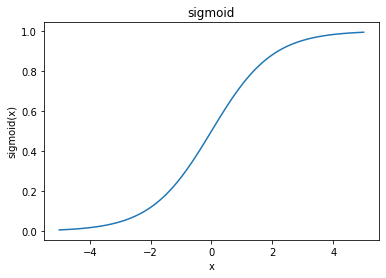

In [5]:
x = np.linspace(-5,5,100)
y = sigmoid(x)
plt.xlabel("x"), plt.ylabel("sigmoid(x)"), plt.title("sigmoid")
plt.plot(x,y)
plt.show()

In [6]:
data = pd.read_csv("log_data.csv", usecols=["grade1", "grade2", "label"]).values
np.set_printoptions(threshold=1000)
print(data)

[[-0.86914432  0.38930975  0.        ]
 [-0.99346735 -0.6105909   0.        ]
 [-0.83406432  0.23923558  0.        ]
 [-0.13647145  0.6320027   1.        ]
 [ 0.40388679  0.31078429  1.        ]
 [-0.56930879 -0.24668082  0.        ]
 [-0.10998219  0.93091718  1.        ]
 [ 0.28899369 -0.53268948  1.        ]
 [ 0.31978216  0.66458158  1.        ]
 [ 0.55868566 -0.62118485  1.        ]
 [ 0.88630192 -0.77669717  0.        ]
 [ 0.28867586 -1.          0.        ]
 [ 0.49774841  0.34411227  1.        ]
 [ 0.12673957  0.96628656  1.        ]
 [-0.72826006  0.3310706   0.        ]
 [-0.31453174  0.71692904  1.        ]
 [ 0.11829901 -0.35144433  1.        ]
 [ 0.08609881 -0.52904022  0.        ]
 [ 0.16391711  0.82590798  1.        ]
 [ 0.34500817 -0.50274932  1.        ]
 [ 0.06962078 -0.64154501  0.        ]
 [ 0.70900896  0.03114329  1.        ]
 [-0.41303572 -0.4652535   0.        ]
 [-0.88094321 -0.60137606  0.        ]
 [ 0.37210637  0.12410277  1.        ]
 [-0.07660494  0.15287538

In [7]:
features = data[:,:2]
labels = data[:,2].reshape(100,1)

In [8]:
#don't run again 
bias = np.ones(shape=(len(x),1))
features = np.append(bias, features, axis=1)

In [9]:
W1 = 0.0
W2 = 0.0
W3 = 0.0
weights = np.array([
    [W1],
    [W2],
    [W3]
])
weights.shape

(3, 1)

In [10]:
#for printing data
#print("features\n{}\nlabels\n{}".format(features, labels))

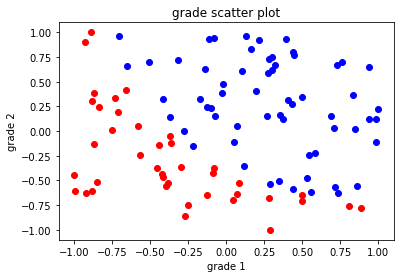

In [11]:
for v in data:
    if v[2] == 1:
        plt.plot(v[0],v[1],"bo")
    else:
        plt.plot(v[0],v[1],"ro")
plt.xlabel("grade 1"), plt.ylabel("grade 2"), plt.title("grade scatter plot")
plt.show()

In [12]:
def predict(features, weights):
    predictions = np.dot(features, weights)
    
    return sigmoid(predictions)

In [13]:
test = predict(features, weights)

In [14]:
def cost_function(features, labels, weights):
    grades = len(labels)
    
    predictions = predict(features, weights)
    #cost when label = 1
    class1_cost = -labels*np.log(predictions)
    
    #cost when label = 0 
    class2_cost = (labels-1)*np.log(1-predictions)
    
    cost = class1_cost + class2_cost
    cost = cost.sum() / grades
    return cost
cost_function(features, labels, weights)

0.6931471805599453

In [15]:
def update_weights(features, labels, weights, lr):
    
    grades = len(labels)
    predictions = predict(features, weights)
    
    gradient = np.dot(features.T, (predictions - labels))
    
    gradient /= grades
    gradient *= lr
    
    weights -= gradient
    return weights

In [16]:
def train(features, labels, weights, lr, iters):
    cost_history = []
    
    for i in range(iters+1):
        update_weights(features, labels, weights, lr)
        
        if i % 1000 == 0:
            cost = cost_function(features, labels, weights)
            cost_history.append(cost)
            
            print("iter={} cost={:.4f}".format(i, cost))
            
    return cost_history, weights
            

In [17]:
cost_history, weights = train(features, labels, weights, 0.01, 8000)

iter=0 cost=0.6926
iter=1000 cost=0.4362
iter=2000 cost=0.3553
iter=3000 cost=0.3157
iter=4000 cost=0.2920
iter=5000 cost=0.2761
iter=6000 cost=0.2647
iter=7000 cost=0.2560
iter=8000 cost=0.2492


In [18]:
weights = np.array([[1.00880654],
       [5.7055786 ],
       [5.4021052 ]])

In [19]:
def decision_boundary(prob):
    return 1 if prob >= .5 else 0

In [20]:
def classify(predictions):
    db = np.vectorize(decision_boundary)
    return db(predictions).flatten().reshape(100,1)

In [21]:
predictions = predict(features, weights)
classifications = classify(predictions)

In [22]:
def accuracy(predicted, actual):
    diff = predicted - actual
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

In [23]:
accuracy(classifications, labels)

0.89

In [24]:
"""final weights
array([[1.00880654],
       [5.7055786 ],
       [5.4021052 ]])
"""

'final weights\narray([[1.00880654],\n       [5.7055786 ],\n       [5.4021052 ]])\n'

In [25]:
sample = np.array([[ 1.        ,  0.28186008,  0.72637626]])

In [26]:
predict(sample, weights)
#output is a probability

array([[0.99855895]])